In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB



df1 = pd.read_csv('adult-training.csv', parse_dates=True)

In [2]:
df = pd.read_csv('adult-training.csv', parse_dates=True)

# Data Cleaning

## Removing rows with garbage value

In [3]:
df1.shape

(48842, 15)

In [4]:
df1=df1.replace(' ?',np.NaN)
df1=df1.dropna()

In [5]:
df1.shape

(45222, 15)

## Dropping unrequired columns

In [6]:
df1=df1.drop('education-num',axis=1)
df1=df1.drop('capital-gain',axis=1)
df1=df1.drop('capital-loss',axis=1)

In [7]:
df1.head(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


## Creating bins for Age

In [8]:
df1['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 34, 25, 43, 40,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 47, 46,
       36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
       90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
       83, 85, 82, 86, 89, 87], dtype=int64)

(array([ 7308., 23630., 12723.,  1561.]),
 array([  0,  25,  45,  65, 100]),
 <a list of 4 Patch objects>)

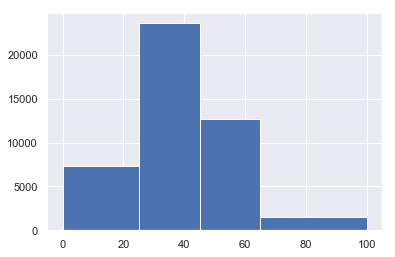

In [9]:
bins = [0,25,45,65,100]
plt.hist(df1['age'],bins)

In [10]:
ages = df1['age']
bins = [0,25,45,65,100]
labels = ["Young", "Middle", "Senior", "Old"]
df1['age'] = pd.cut(ages, bins, labels = labels,include_lowest = True)


In [11]:
df1.head(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,Middle,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,Senior,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,Middle,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,Senior,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,Middle,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [12]:
df1.groupby('age').count()

,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
age,,,,,,,,,,,
Young,8441,8441,8441,8441,8441,8441,8441,8441,8441,8441,8441
Middle,23546,23546,23546,23546,23546,23546,23546,23546,23546,23546,23546
Senior,11891,11891,11891,11891,11891,11891,11891,11891,11891,11891,11891
Old,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344


## Categorizing Education

In [13]:
df1.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

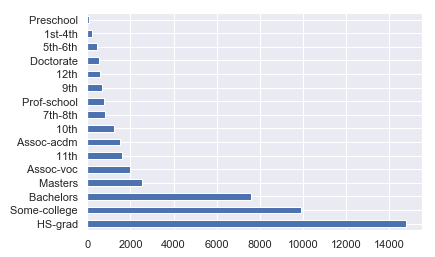

In [14]:
df1['education'].value_counts()[:20].plot(kind='barh')

In [15]:
def Job2Num(Job_String):
    if Job_String == ' 11th' or Job_String == ' 12th' or Job_String == ' Preschool' or Job_String ==' 9th' or Job_String ==' 7th-8th' or Job_String ==' 5th-6th' or Job_String ==' 10th' or Job_String ==' 1st-4th' :
        return 'Dropout'
    elif Job_String == ' Assoc-acdm' or Job_String == ' Assoc-voc':
        return 'Associates'
    elif Job_String == '  HS-grad' or Job_String == ' Some-college' or Job_String == ' Prof-school' :
        return 'some-college'
    else:
        return Job_String

In [16]:
education=df1.education
df1['education'] = education.apply(Job2Num)

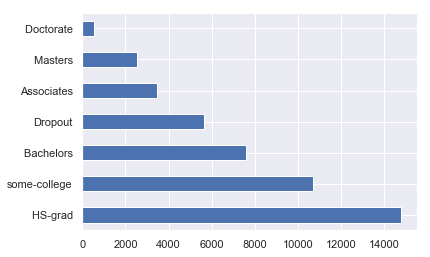

In [17]:
df1['education'].value_counts()[:20].plot(kind='barh')

In [18]:
df1.education.unique()

array([' Bachelors', ' HS-grad', 'Dropout', ' Masters', 'some-college',
       'Associates', ' Doctorate'], dtype=object)

## Categorizing Marital Status

In [19]:
df1['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

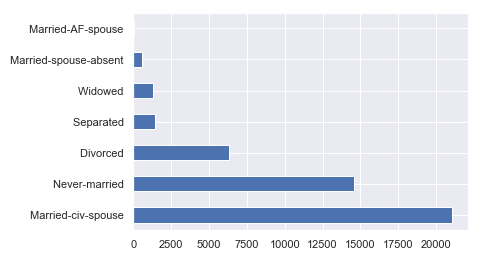

In [20]:
df1['marital-status'].value_counts()[:20].plot(kind='barh')

In [21]:
def MaritalStatus(Job_String):
    if Job_String == ' Divorced' or Job_String == ' Married-spouse-absent' or Job_String == ' Separated':
        return 'Not-married'
    elif Job_String == ' Married-civ-spouse' or Job_String == ' Married-AF-spouse':
        return 'Married'
    else:
        return Job_String

In [22]:
maritalStatus=df1['marital-status']
df1['marital-status'] = maritalStatus.apply(MaritalStatus)

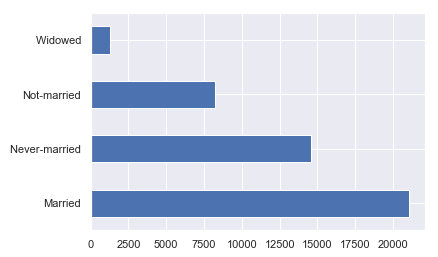

In [23]:
df1['marital-status'].value_counts()[:20].plot(kind='barh')

In [24]:
df1['marital-status'].unique()

array([' Never-married', 'Married', 'Not-married', ' Widowed'],
      dtype=object)

In [25]:
df1.head(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,Middle,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,Senior,Self-emp-not-inc,83311,Bachelors,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,Middle,Private,215646,HS-grad,Not-married,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,Senior,Private,234721,Dropout,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,Middle,Private,338409,Bachelors,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


## Categorizing Occupation

In [26]:
df1.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

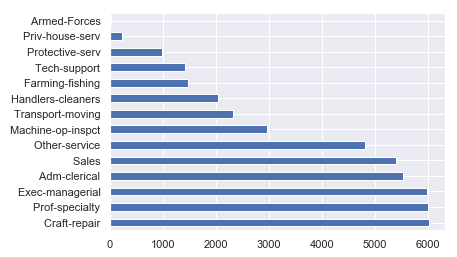

In [27]:
df1['occupation'].value_counts()[:20].plot(kind='barh')

In [28]:
def occupationJob(Job_String):
    if Job_String == ' Craft-repair' or Job_String == ' Farming-fishing' or Job_String == ' Handlers-cleaners' or Job_String ==' Machine-op-inspct' or Job_String== ' Transport-moving' :
        return ' Blue-Collar'
    elif Job_String == ' Adm-clerical':
        return ' Admin'
    elif Job_String == ' Exec-managerial':
        return ' White-collar'
    elif Job_String == ' Other-service' or Job_String == ' Priv-house-serv' :
        return ' Service'
    elif Job_String == ' Prof-specialty':
        return ' Professional'
    elif Job_String == ' Protective-serv' or Job_String == ' Tech-support' :
        return ' Other-Occupations'
    else:
        return Job_String

In [29]:
occupation=df1['occupation']
df1['occupation'] = occupation.apply(occupationJob)

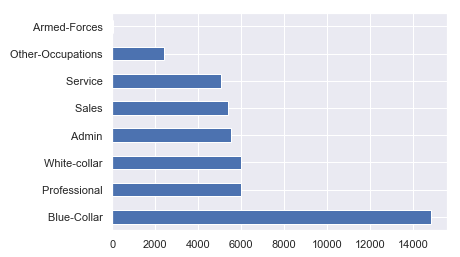

In [30]:
df1['occupation'].value_counts()[:20].plot(kind='barh')

In [31]:
df1.occupation.unique()

array([' Admin', ' White-collar', ' Blue-Collar', ' Professional',
       ' Service', ' Sales', ' Other-Occupations', ' Armed-Forces'],
      dtype=object)

In [32]:
df1.head(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,Middle,State-gov,77516,Bachelors,Never-married,Admin,Not-in-family,White,Male,40,United-States,<=50K
1,Senior,Self-emp-not-inc,83311,Bachelors,Married,White-collar,Husband,White,Male,13,United-States,<=50K
2,Middle,Private,215646,HS-grad,Not-married,Blue-Collar,Not-in-family,White,Male,40,United-States,<=50K
3,Senior,Private,234721,Dropout,Married,Blue-Collar,Husband,Black,Male,40,United-States,<=50K
4,Middle,Private,338409,Bachelors,Married,Professional,Wife,Black,Female,40,Cuba,<=50K


## Categorizing Native country

In [33]:
df1['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

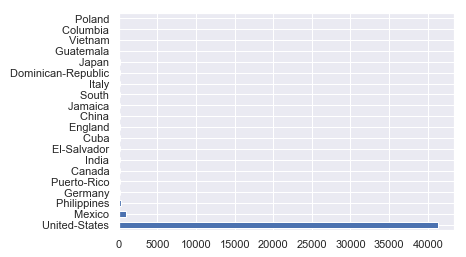

In [34]:
df1['native-country'].value_counts()[:20].plot(kind='barh')

In [35]:
df1.loc[(df1['native-country']==' Cambodia'),'native-country'] = 'Asia'
df1.loc[(df1['native-country']==' Canada'),'native-country'] = 'British-Commonwealth'   
df1.loc[(df1['native-country']==' China'),'native-country'] = 'China'      
df1.loc[(df1['native-country']==' Columbia'),'native-country'] = 'South-America'   
df1.loc[(df1['native-country']==' Cuba'),'native-country'] = 'Other'       
df1.loc[(df1['native-country']==' Dominican-Republic'),'native-country'] = 'Latin-America'
df1.loc[(df1['native-country']==' Ecuador'),'native-country'] = 'South-America'    
df1.loc[(df1['native-country']==' El-Salvador'),'native-country'] = 'South-America'
df1.loc[(df1['native-country']==' England'),'native-country'] = 'British-Commonwealth'
df1.loc[(df1['native-country']==' France'),'native-country'] = 'Euro'
df1.loc[(df1['native-country']==' Germany'),'native-country'] = 'Euro'
df1.loc[(df1['native-country']==' Greece'),'native-country'] = 'Euro'
df1.loc[(df1['native-country']==' Guatemala'),'native-country'] = 'Latin-America'
df1.loc[(df1['native-country']==' Haiti'),'native-country'] = 'Latin-America'
df1.loc[(df1['native-country']==' Holand-Netherlands'),'native-country'] = 'Euro'
df1.loc[(df1['native-country']==' Honduras'),'native-country'] = 'Latin-America'
df1.loc[(df1['native-country']==' Hong'),'native-country'] = 'China'
df1.loc[(df1['native-country']==' Hungary'),'native-country'] = 'Euro'
df1.loc[(df1['native-country']==' India'),'native-country'] = 'British-Commonwealth'
df1.loc[(df1['native-country']==' Iran'),'native-country'] = 'Other'
df1.loc[(df1['native-country']==' Ireland'),'native-country'] = 'British-Commonwealth'
df1.loc[(df1['native-country']==' Italy'),'native-country'] = 'Euro'
df1.loc[(df1['native-country']==' Jamaica'),'native-country'] = 'Latin-America'
df1.loc[(df1['native-country']==' Japan'),'native-country'] = 'Other'
df1.loc[(df1['native-country']==' Laos'),'native-country'] = 'Asia'
df1.loc[(df1['native-country']==' Mexico'),'native-country'] = 'Latin-America'
df1.loc[(df1['native-country']==' Nicaragua'),'native-country'] = 'Latin-America'
df1.loc[(df1['native-country']==' Outlying-US(Guam-USVI-etc)'),'native-country'] = 'Latin-America'
df1.loc[(df1['native-country']==' Peru'),'native-country'] = 'South-America'
df1.loc[(df1['native-country']==' Philippines'),'native-country'] = 'Asia'
df1.loc[(df1['native-country']==' Poland'),'native-country'] = 'Euro'
df1.loc[(df1['native-country']==' Portugal'),'native-country'] = 'Euro'
df1.loc[(df1['native-country']==' Puerto-Rico'),'native-country'] = 'Latin-America'
df1.loc[(df1['native-country']==' Scotland'),'native-country'] = 'British-Commonwealth'
df1.loc[(df1['native-country']==' South'),'native-country'] = 'Euro'
df1.loc[(df1['native-country']==' Taiwan'),'native-country'] = 'China'
df1.loc[(df1['native-country']==' Thailand'),'native-country'] = 'Asia'
df1.loc[(df1['native-country']==' Trinadad&Tobago'),'native-country'] = 'Latin-America'
df1.loc[(df1['native-country']==' United-States'),'native-country'] = 'United-States'
df1.loc[(df1['native-country']==' Vietnam'),'native-country'] = 'Asia'
df1.loc[(df1['native-country']==' Yugoslavia'),'native-country'] = 'Euro'

In [36]:
df1.groupby('native-country').count()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,salary
native-country,,,,,,,,,,,
Asia,442,442,442,442,442,442,442,442,442,442,442
British-Commonwealth,485,485,485,485,485,485,485,485,485,485,485
China,196,196,196,196,196,196,196,196,196,196,196
Euro,664,664,664,664,664,664,664,664,664,664,664
Latin-America,1548,1548,1548,1548,1548,1548,1548,1548,1548,1548,1548
Other,278,278,278,278,278,278,278,278,278,278,278
South-America,317,317,317,317,317,317,317,317,317,317,317
United-States,41292,41292,41292,41292,41292,41292,41292,41292,41292,41292,41292


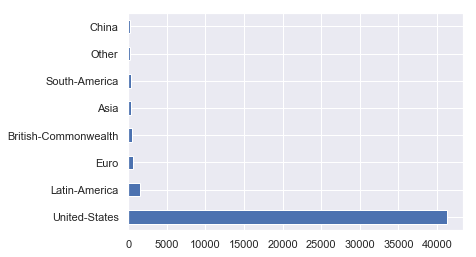

In [37]:
df1['native-country'].value_counts()[:20].plot(kind='barh')

In [38]:
df1.head(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,Middle,State-gov,77516,Bachelors,Never-married,Admin,Not-in-family,White,Male,40,United-States,<=50K
1,Senior,Self-emp-not-inc,83311,Bachelors,Married,White-collar,Husband,White,Male,13,United-States,<=50K
2,Middle,Private,215646,HS-grad,Not-married,Blue-Collar,Not-in-family,White,Male,40,United-States,<=50K
3,Senior,Private,234721,Dropout,Married,Blue-Collar,Husband,Black,Male,40,United-States,<=50K
4,Middle,Private,338409,Bachelors,Married,Professional,Wife,Black,Female,40,Other,<=50K


## Categorizing workclass

In [39]:
df1.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

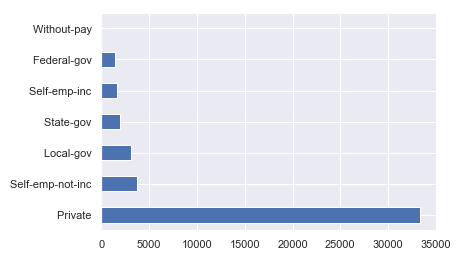

In [40]:
df1['workclass'].value_counts()[:20].plot(kind='barh')

In [41]:
def WorkClass(Job_String):
    if Job_String == ' State-gov' or Job_String == ' Local-gov' :
        return 'State-gov'
    
    if Job_String == ' Self-emp-not-inc' or Job_String == ' Self-emp-inc' :
        return ' Self-emp-inc'
    else:
        return Job_String

In [42]:
workclass=df1['workclass']
df1['workclass'] = workclass.apply(WorkClass)

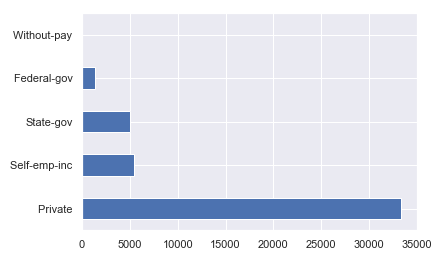

In [43]:
df1['workclass'].value_counts()[:20].plot(kind='barh')

In [44]:
df1.workclass.unique()

array(['State-gov', ' Self-emp-inc', ' Private', ' Federal-gov',
       ' Without-pay'], dtype=object)

## Cleaning Salary

In [45]:
df1.salary.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [46]:
def Salary(Job_String):
    if Job_String == ' <=50K' or Job_String == ' <=50K.' :
        return '<=50K'
    elif Job_String == ' >50K' or Job_String == ' >50K.' :
        return '>50K'
    else:
        return Job_String

In [47]:
salary=df1['salary']
df1['salary'] = salary.apply(Salary)


In [48]:
salary1=df['salary']
df['salary'] = salary1.apply(Salary)

In [49]:
df1.salary.unique()

array(['<=50K', '>50K'], dtype=object)

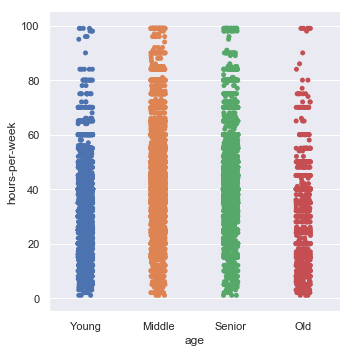

In [50]:
ax = sns.catplot(x="age", y="hours-per-week", data=df1)

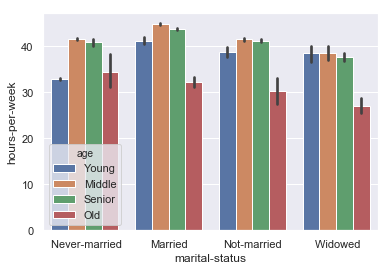

In [51]:
s=sns.barplot(x="marital-status",y="hours-per-week",hue='age',data=df1)

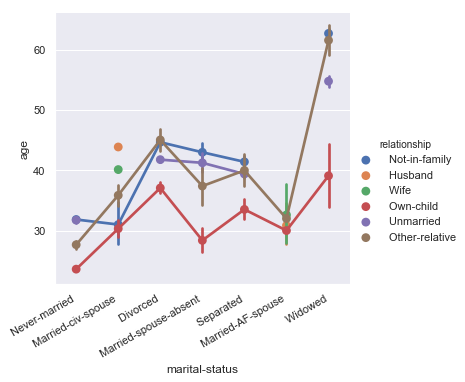

In [52]:

ax = sns.catplot(x="marital-status",y="age",hue="relationship",kind="point",data=df)
ax.fig.autofmt_xdate()

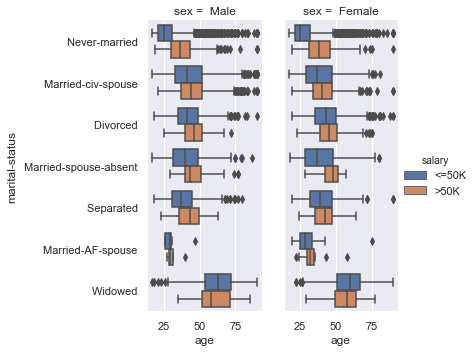

In [53]:
sns.catplot(x="age", y="marital-status", hue="salary",
            col="sex", aspect=.6,
            kind="box", data=df);

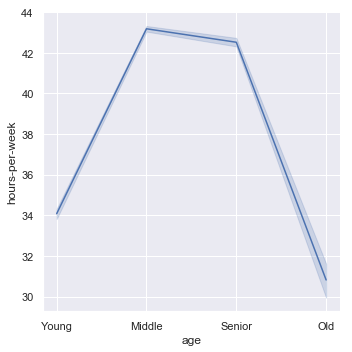

In [54]:
ageVShours_per_week = sns.relplot(x="age", y="hours-per-week", kind="line", data=df1)

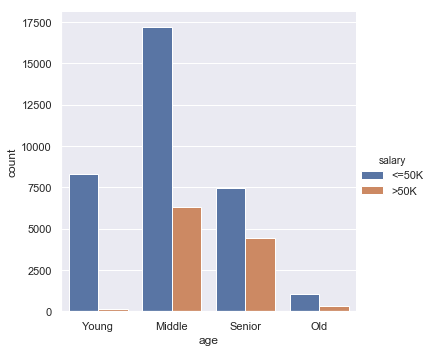

In [55]:
sns.catplot(x='age',hue="salary",kind='count',data=df1,orient="h")


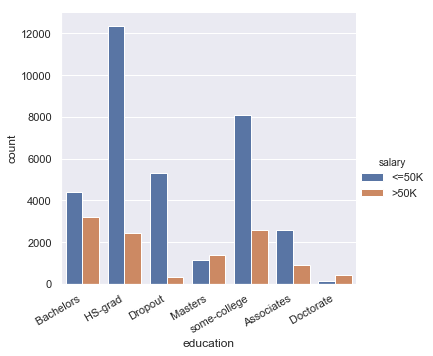

In [56]:
income_by_education = sns.catplot(x='education',hue="salary",kind='count',data=df1,orient="h")
income_by_education.fig.autofmt_xdate()

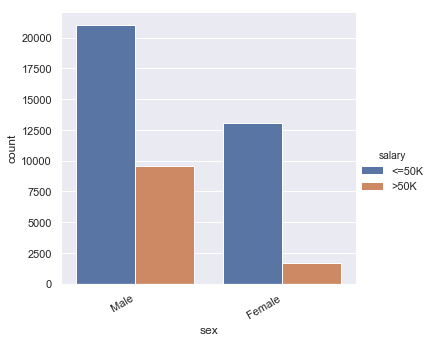

In [57]:
income_by_sex = sns.catplot(x='sex',hue="salary",kind='count',data=df1,orient="h")
income_by_sex.fig.autofmt_xdate()

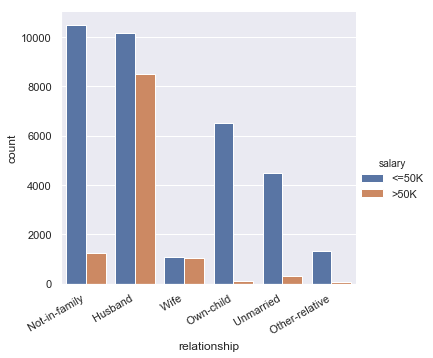

In [58]:
income_by_relationship = sns.catplot(x='relationship',hue="salary",kind='count',data=df1,orient="h")
income_by_relationship.fig.autofmt_xdate()

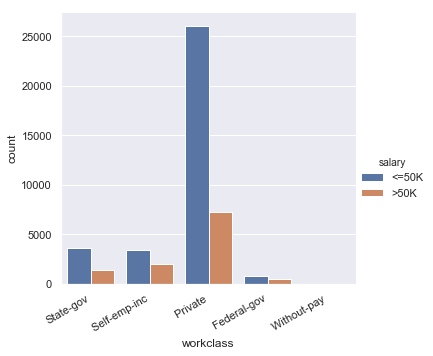

In [59]:
income_by_workclass = sns.catplot(x='workclass',hue="salary",kind='count',data=df1,orient="h")
income_by_workclass.fig.autofmt_xdate()

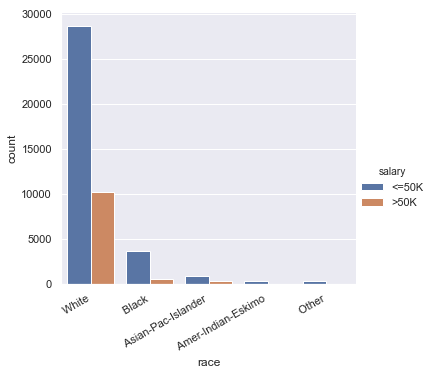

In [60]:
income_by_race = sns.catplot(x='race',hue="salary",kind='count',data=df1,orient="h")
income_by_race.fig.autofmt_xdate()

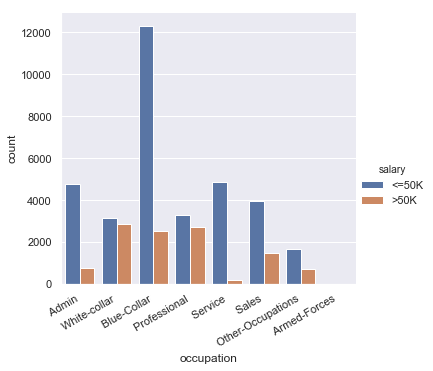

In [61]:
income_by_occupation = sns.catplot(x='occupation',hue="salary",kind='count',data=df1,orient="h")
income_by_occupation.fig.autofmt_xdate()

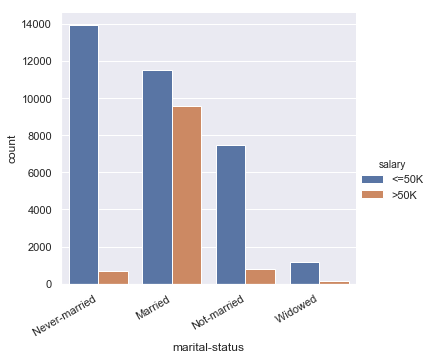

In [62]:
income_by_marital = sns.catplot(x='marital-status',hue="salary",kind='count',data=df1,orient="h")
income_by_marital.fig.autofmt_xdate()

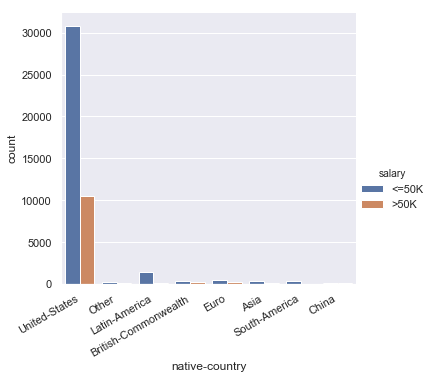

In [63]:
income_by_country = sns.catplot(x='native-country',hue="salary",kind='count',data=df1,orient="h")
income_by_country.fig.autofmt_xdate()

## Converting to categorical integer data for fitting in ML models

In [64]:
print(df1.dtypes)

age               category
workclass           object
fnlwgt               int64
education           object
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
hours-per-week       int64
native-country      object
salary              object
dtype: object


In [65]:
df1.workclass = pd.Categorical(pd.factorize(df1.workclass)[0])

In [66]:
df1.education = pd.Categorical(pd.factorize(df1.education)[0])

In [67]:
df1["marital-status"] = pd.Categorical(pd.factorize(df1["marital-status"])[0])

In [68]:
df1.occupation = pd.Categorical(pd.factorize(df1.occupation)[0])

In [69]:
df1.relationship = pd.Categorical(pd.factorize(df1.relationship)[0])

In [70]:
df1.race = pd.Categorical(pd.factorize(df1.race)[0])

In [71]:
df1.sex = pd.Categorical(pd.factorize(df1.sex)[0])

In [72]:
df1["hours-per-week"] = pd.Categorical(pd.factorize(df1["hours-per-week"])[0])

In [73]:
df1["native-country"] = pd.Categorical(pd.factorize(df1["native-country"])[0])

In [74]:
df1["salary"]= df1["salary"].astype(str) 
# df1.salary = pd.Categorical(pd.factorize(df1.salary)[0])

In [75]:
df1.age = pd.Categorical(pd.factorize(df1.age)[0])

In [76]:
df1.head(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,0,0,77516,0,0,0,0,0,0,0,0,<=50K
1,1,1,83311,0,1,1,1,0,0,1,0,<=50K
2,0,2,215646,1,2,2,0,0,0,0,0,<=50K
3,1,2,234721,2,1,2,1,1,0,0,0,<=50K
4,0,2,338409,0,1,3,2,1,1,0,1,<=50K


In [77]:
print(df1.dtypes)

age               category
workclass         category
fnlwgt               int64
education         category
marital-status    category
occupation        category
relationship      category
race              category
sex               category
hours-per-week    category
native-country    category
salary              object
dtype: object


In [78]:
df1.rename(columns = {'marital-status':'maritalstatus'}, inplace = True) 
df1.rename(columns = {'hours-per-week':'hoursperweek'}, inplace = True) 
df1.rename(columns = {'native-country':'nativecountry'}, inplace = True) 

## Spark ML

In [79]:
import pyspark
from operator import add
from pyspark.context import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext 
import pandas as pd
from pyspark.sql.functions import lower, col
from pyspark.sql.functions import *


In [80]:
spark = SparkSession\
        .builder\
        .appName("ML")\
        .getOrCreate()

In [81]:
sdf=spark.createDataFrame(df1)

In [82]:
sdf.registerTempTable("sdf")

In [83]:
spark.sql('SELECT * FROM sdf').show(2)

+---+---------+------+---------+-------------+----------+------------+----+---+------------+-------------+------+
|age|workclass|fnlwgt|education|maritalstatus|occupation|relationship|race|sex|hoursperweek|nativecountry|salary|
+---+---------+------+---------+-------------+----------+------------+----+---+------------+-------------+------+
|  0|        0| 77516|        0|            0|         0|           0|   0|  0|           0|            0| <=50K|
|  1|        1| 83311|        0|            1|         1|           1|   0|  0|           1|            0| <=50K|
+---+---------+------+---------+-------------+----------+------------+----+---+------------+-------------+------+
only showing top 2 rows



In [84]:
adultdf = spark.sql("SELECT age, workclass, education, maritalstatus, occupation, relationship, race, \
                    sex, hoursperweek, salary FROM sdf")

In [85]:
from pyspark.ml.feature import StringIndexer
# Convert target into numerical categories
labelIndexer = StringIndexer(inputCol="salary", outputCol="label")

In [86]:
(trainingData, testData) = adultdf.randomSplit([0.7, 0.3], seed = 100)

In [87]:
trainingData.cache()
testData.cache()

DataFrame[age: bigint, workclass: bigint, education: bigint, maritalstatus: bigint, occupation: bigint, relationship: bigint, race: bigint, sex: bigint, hoursperweek: bigint, salary: string]

DataFrame[age: bigint, workclass: bigint, education: bigint, maritalstatus: bigint, occupation: bigint, relationship: bigint, race: bigint, sex: bigint, hoursperweek: bigint, salary: string]

In [88]:
from pyspark.ml.feature import VectorAssembler

In [89]:
vecAssembler = VectorAssembler(inputCols=["age", "workclass", "education", "maritalstatus", \
                "occupation", "relationship", "race", "sex", "hoursperweek"], outputCol="features")

In [90]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml import Pipeline

# Train a NaiveBayes model
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

# Chain labelIndexer, vecAssembler and NBmodel in a 
pipeline = Pipeline(stages=[labelIndexer, vecAssembler, nb])

# Run stages in pipeline and train model
model = pipeline.fit(trainingData)

In [91]:
predictions = model.transform(testData)


In [106]:
predictions.printSchema()


root
 |-- age: long (nullable = true)
 |-- workclass: long (nullable = true)
 |-- education: long (nullable = true)
 |-- maritalstatus: long (nullable = true)
 |-- occupation: long (nullable = true)
 |-- relationship: long (nullable = true)
 |-- race: long (nullable = true)
 |-- sex: long (nullable = true)
 |-- hoursperweek: long (nullable = true)
 |-- salary: string (nullable = true)
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [108]:
maxProbability=predictions.select("age", "workclass", "education", "maritalstatus", \
                "occupation", "relationship", "race", "sex", "hoursperweek","label", "prediction", "probability")

In [112]:

maxProbability.orderBy(desc("probability")).show(5)

+---+---------+---------+-------------+----------+------------+----+---+------------+-----+----------+--------------------+
|age|workclass|education|maritalstatus|occupation|relationship|race|sex|hoursperweek|label|prediction|         probability|
+---+---------+---------+-------------+----------+------------+----+---+------------+-----+----------+--------------------+
|  2|        2|        1|            0|         2|           5|   4|  1|           8|  0.0|       0.0|[0.99447564247215...|
|  2|        2|        1|            0|         4|           5|   4|  1|           7|  0.0|       0.0|[0.99360238756702...|
|  2|        2|        1|            0|         4|           4|   4|  1|           0|  0.0|       0.0|[0.99227832947905...|
|  2|        2|        0|            0|         0|           5|   2|  1|           2|  0.0|       0.0|[0.99217865211322...|
|  2|        2|        4|            0|         5|           5|   4|  1|           6|  0.0|       0.0|[0.99001958493879...|
+---+---

In [94]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                                  metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
accuracy

0.7392987419042656

In [95]:
from pyspark.mllib.evaluation import MulticlassMetrics
# Create (prediction, label) pairs
predictionAndLabel = predictions.select("prediction", "label").rdd

# Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel)
print( metrics.confusionMatrix())


DenseMatrix([[9765.,  392.],
             [3110.,  166.]])


In [96]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid and Evaluator for Cross Validation
paramGrid = ParamGridBuilder().addGrid(nb.smoothing, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]).build()
cvEvaluator = MulticlassClassificationEvaluator(metricName="accuracy")

In [97]:
cv = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid, evaluator=cvEvaluator)
cvModel = cv.fit(trainingData)

In [98]:
cvPredictions = cvModel.transform(testData)

In [99]:
evaluator.evaluate(cvPredictions)

0.7393731854388447

In [100]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.util import MLUtils
from pyspark.mllib.evaluation import MulticlassMetrics

metrics = MulticlassMetrics(predictionAndLabel)

In [101]:
precision = metrics.precision()
recall = metrics.recall()
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)

Summary Stats
Precision = 0.7392987419042656
Recall = 0.7392987419042656
F1 Score = 0.7392987419042656


## Scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test = train_test_split(df1, test_size=0.05)

In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
gnb = GaussianNB()

In [ ]:
used_features=["age","workclass",
"fnlwgt",
"education",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"hours-per-week",
"native-country"]

In [ ]:
clf = CategoricalNB()

In [ ]:
X_train[used_features]

In [ ]:
clf.fit(X_train[used_features].values, X_train["Income"])

In [ ]:
y_pred = gnb.predict(X_test[used_features])

In [ ]:
iris = load_iris()

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(df,iris.target)

In [ ]:
GaussianNB(priors=None)

In [ ]:
gnb.score(df,iris.target)

In [ ]:
iris.data[-1:]